# MLP Assignment - Wine Fraud

## A. Import the dataset, and add header columns with the names function 
### Check out the data 

In [2]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [3]:
wine = pd.read_csv('C:/Users/Admin/Downloads/wine.csv', names = ["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"])

In [4]:
wine.head()

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## B. Split your data into training and testing sets using SciKitLearn'strain_test_split function from model_selection 
### a. It is highly recommended to scale your data. You must apply the same scaling to the test set for meaningful results. Use the built-in Standard Scaler for standardization. 
### b. Train your model using ScikitLearn’s estimator objects 
### c. Create an instance of the model by defining the hidden_layer_sizes 
### d. Fit the training data to your model 

In [5]:
wine_X = wine.drop('Cultivator', axis=1)
wine_y = wine['Cultivator']

In [6]:
wine_X

,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [7]:
wine_y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Cultivator, Length: 178, dtype: int64

In [8]:
# Splitting dataset into training and testing data

train_x, test_x, train_y, test_y = train_test_split(wine_X, wine_y, test_size = 0.2, random_state = 1)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((142, 13), (36, 13), (142,), (36,))

In [9]:
# To train the MLP network it is important to scale the data

sc = StandardScaler()

In [10]:
scaler = sc.fit(train_x)
train_x_scaled = scaler.transform(train_x)
test_x_scaled = scaler.transform(test_x)

In [11]:
mlp_clf = MLPClassifier(hidden_layer_sizes = (150, 100, 50), activation = 'relu', solver = 'adam', max_iter = 300)
mlp_clf.fit(train_x_scaled, train_y)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300)

## C. Use predict () method to get predictions 
### a. Use SciKit-Learn's built in metrics to evaluate how well our model performed 
### b. Extract the MLP weights and biases after training your model

In [12]:
y_pred = mlp_clf.predict(test_x_scaled)

In [13]:
print(f'Accuracy: {accuracy_score(test_y, y_pred)}')

Accuracy: 1.0


C:\Users\Admin\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


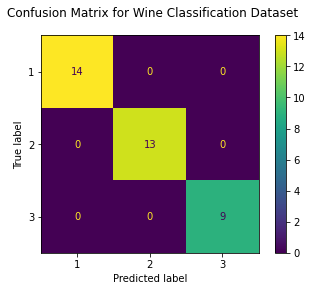

In [14]:
fig = plot_confusion_matrix(mlp_clf, test_x_scaled, test_y, display_labels = mlp_clf.classes_)
fig.figure_.suptitle('Confusion Matrix for Wine Classification Dataset')
plt.show()

In [15]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



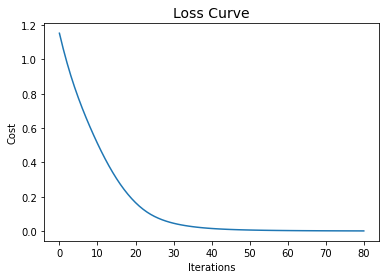

In [16]:
plt.plot(mlp_clf.loss_curve_)
plt.title('Loss Curve', fontsize = 14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [17]:
# To extract the weight and bias of the MLP classifier model, we will use coef_ and intercepts_

len(mlp_clf.coefs_)

4

In [18]:
len(mlp_clf.intercepts_)

4